In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score

from xgboost import XGBRegressor

In [169]:
# Load Dataset
df = pd.read_csv("/Users/sa18/Desktop/House_Price/Data/cleaned_train.csv")

In [170]:
# separate features from target variable `SalePrice`
X = df.drop(columns="SalePrice")
y = df["SalePrice"]

# implement Train-Test-Spilt
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data loaded and split:")
print("Training shape:", X_train.shape)
print("Test shape", X_test.shape)

Data loaded and split:
Training shape: (1168, 10)
Test shape (292, 10)


### Random Forest

In [171]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Make Prediction
rf_preds = rf.predict(X_test)

# Evaluate
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
rf_r2 = r2_score(y_test, rf_preds)

#Print Results

print(f"Random Forest RSME: {rf_rmse:.2f}")
print(f"Random Forest R2 Score: {rf_r2:.4f}")

Random Forest RSME: 0.16
Random Forest R2 Score: 0.8604


### Gradient Boosting

In [172]:
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)

# Make Prediction
gb_preds = gb.predict(X_test)

# Evaluate
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_preds))
gb_r2 = r2_score(y_test, gb_preds)

# Print Results
print(f"Gradient Boosting RSME: {gb_rmse:.2f}")
print(f"Gradient Boosting R2 Score: {gb_r2:.4f}")

Gradient Boosting RSME: 0.16
Gradient Boosting R2 Score: 0.8654


### XG Boost

In [173]:
xgb = XGBRegressor(random_state=42, verbosity=1)
xgb.fit(X_train, y_train)

# Make Prediction
xgb_preds = xgb.predict(X_test)

# Evaluate
xgb_rmse = np.sqrt(mean_squared_error(y_test, gb_preds))
xgb_r2 = r2_score(y_test, xgb_preds)

# Print Results
print(f"XG Boost RSME: {gb_rmse:.2f}")
print(f"XG Boost R2 Score: {gb_r2:.4f}")

XG Boost RSME: 0.16
XG Boost R2 Score: 0.8654


/var/folders/7d/lbg415rs1336xg8yjmf1h_3c0000gn/T/ipykernel_14796/2238575461.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=rmse_values, hue=None, legend=False, palette='viridis')


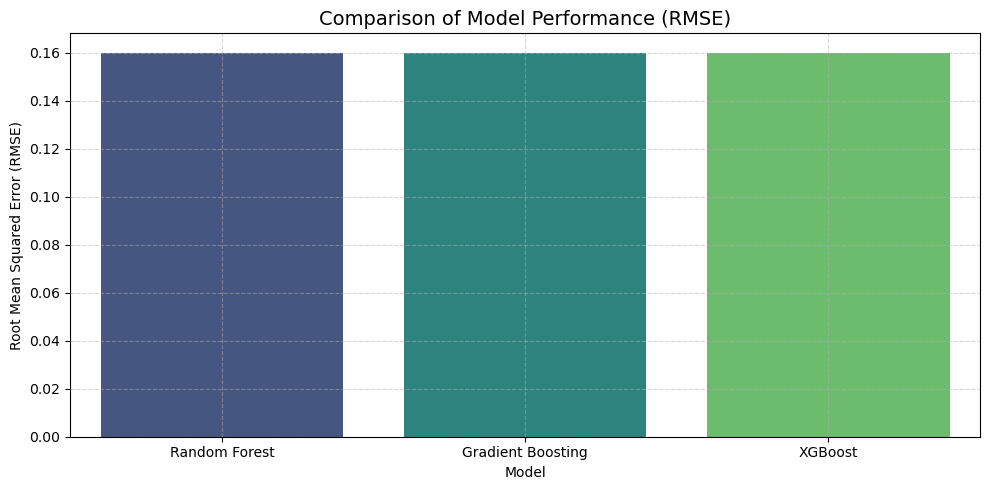

/var/folders/7d/lbg415rs1336xg8yjmf1h_3c0000gn/T/ipykernel_14796/2238575461.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=r2_scores, hue=None, legend=False, palette='mako')


<Axes: >

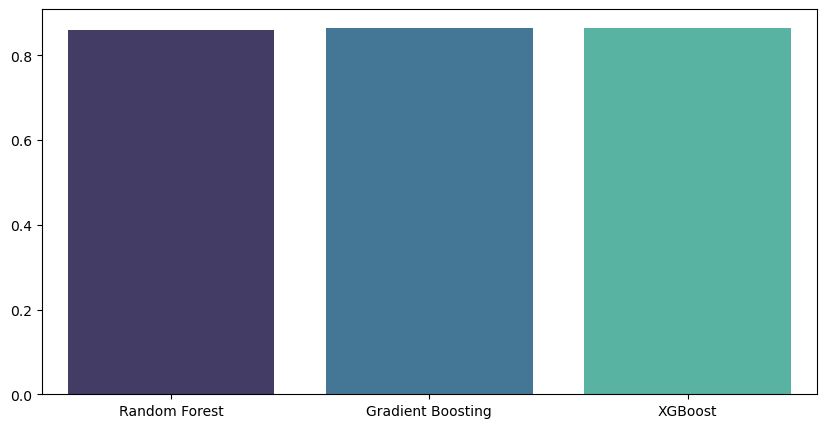

In [174]:
model_names = ['Random Forest', 'Gradient Boosting', 'XGBoost']

# RMSE and R2 values from previous results
rmse_values = [0.16, 0.16, 0.16]
r2_scores = [0.8604, 0.8654, 0.8654]

# Plot RMSE comparison
plt.figure(figsize=(10, 5))
sns.barplot(x=model_names, y=rmse_values, hue=None, legend=False, palette='viridis')
plt.title('Comparison of Model Performance (RMSE)', fontsize=14)
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.xlabel('Model')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Plot R2 comparison
plt.figure(figsize=(10, 5))
sns.barplot(x=model_names, y=r2_scores, hue=None, legend=False, palette='mako')


### Randomized SearchCV to tune XGBoost Regressor

In [175]:
# Set up parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

In [176]:
# Initialize the model
xgb = XGBRegressor(random_state=42, objective='reg:squarederror')

# Set up randomized search
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=25,
    scoring='neg_root_mean_squared_error',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=1
)

In [177]:
# Fit search to data
random_search.fit(X_train, y_train)

# Best model
best_xgb = random_search.best_estimator_

# Predict and evaluate
xgb_preds = best_xgb.predict(X_test)
xgb_rmse_tuned = np.sqrt(mean_squared_error(y_test, xgb_preds))
xgb_r2_tuned = r2_score(y_test, xgb_preds)

print(f"Tuned XGBoost RMSE: {xgb_rmse_tuned:.4f}")
print(f"Tuned XGBoost R2 Score: {xgb_r2_tuned:.4f}")
print("Best Parameters:", random_search.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Tuned XGBoost RMSE: 0.1581
Tuned XGBoost R2 Score: 0.8660
Best Parameters: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 0.6}


# Applying XGBoost to Test Data

In [178]:
test_df = pd.read_csv("/Users/sa18/Desktop/House_Price/Data/test.csv")


In [179]:
test_df = test_df[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'GarageCars',
             'ExterQual', 'BsmtQual', 'KitchenQual']]

In [180]:
# Fill NaNs with 0
numeric_cols = test_df.select_dtypes(include=["int64", "float64"]).columns
test_df[numeric_cols] = test_df[numeric_cols].fillna(0)

# Fill categorical NaNs with "None"
categorical_cols = ['ExterQual', 'BsmtQual', 'KitchenQual']
test_df[categorical_cols] = test_df[categorical_cols].fillna("None")

In [181]:
for col in categorical_cols:
    test_df[col] = test_df[col].astype(str)

quality_order = ["None", "Po", "Fa", "TA", "Gd", "Ex"]
encoder = OrdinalEncoder(categories=[quality_order, quality_order, quality_order])
test_df[["ExterQual", "BsmtQual", "KitchenQual"]] = encoder.fit_transform(
    test_df[["ExterQual", "BsmtQual", "KitchenQual"]]
    )


In [182]:
test_preds = best_xgb.predict(test_df)

In [183]:
final_preds = np.expm1(test_preds)

In [184]:
submission_df = pd.read_csv("/Users/sa18/Desktop/House_Price/Data/test.csv")
submission = pd.DataFrame({
    "Id": submission_df["Id"],
    'SalePrice': final_preds
})
submission.to_csv("/Users/sa18/Desktop/House_Price/Data/submission.csv", index=False)